In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dict_diabetes = load_diabetes()

In [4]:
X= dict_diabetes.data

In [5]:
y= dict_diabetes.target

In [6]:
y= (y-y.mean(axis=0))/y.std()

In [7]:
y

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model= Sequential()

In [12]:
model.add(Dense(units=128,activation='relu',input_shape=[X_train.shape[1]]))

In [13]:
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

In [14]:
model.add(Dense(1))

In [15]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [34]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.15,batch_size=10,verbose=False)

In [35]:
results=model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.7937 - mae: 0.7004


In [28]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [29]:
import pandas as pd

In [30]:
df= pd.DataFrame(history.history)
df.head()

,loss,mae,val_loss,val_mae
0,0.007603,0.069722,0.711523,0.638721
1,0.004546,0.053093,0.697271,0.624982
2,0.005211,0.056361,0.715975,0.634908
3,0.005790,0.060633,0.687905,0.625938
4,0.003577,0.047555,0.682994,0.625536


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

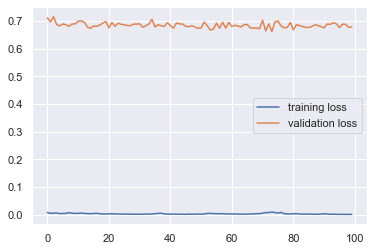

In [32]:
plt.plot(df.loss,label='training loss')
plt.plot(df.val_loss,label='validation loss')
plt.legend();